# Vanilla Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

In [2]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [5]:
def option_payoff_at_maturity(strike, premium, option="call", position="long"):
    # underlying prices
    underlying_prices = np.linspace(0, 2*strike, 100)
    
    # strike prices (repeated)
    strike_prices = np.repeat(strike, underlying_prices.shape[0]) 
    
    # call premiums (repeated)
    premiums = np.repeat(premium, underlying_prices.shape[0])

    # vector of zeros
    zeros = np.repeat(0, underlying_prices.shape[0])
        
    if option is "call" and position is "long": 
        call_payoff = np.maximum(underlying_prices - strike_prices, zeros)
        return pd.Series(call_payoff - premiums, index=underlying_prices, name="call payoff")

    elif option is "call" and position is "short":
        call_payoff = - np.maximum(underlying_prices - strike_prices, zeros)
        return pd.Series(call_payoff + premiums, index=underlying_prices, name="call payoff")

    elif option is "put" and position is "long":
        put_payoff = np.maximum(strike_prices - underlying_prices, zeros)
        return pd.Series(put_payoff - premiums, index=underlying_prices, name="put payoff")

    elif option is "put" and position is "short":
        put_payoff = - np.maximum(strike_prices - underlying_prices, zeros)
        return pd.Series(put_payoff + premiums, index=underlying_prices, name="put payoff")
    
    else:
        raise ValueError("Error in option type or position")
        
    
    
'''
def option_plot(option, strike,  option_type="call", position="long"):
    fs = 12
    option.plot(grid=True, figsize=(7,4), label=None)
    plt.axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
    plt.axvline(x=strike, linestyle="-.", linewidth=1.3, label="strike price K")
    plt.title("{} {}".format(option_type,position), fontsize=fs)
    plt.xlabel("underlying price", fontsize=fs)
    plt.legend()
'''

def normal_pdf(x, mu=0, std=1):
    '''
    Standard normal probability density function
    '''
    return 1.0 / (std*(2*np.pi)**(0.5)) * np.exp( -0.5*((x-mu)/std)**2 )

def normal_std_cdf(x):
    '''
    An approximation to the cumulative distribution
    function for the standard normal distribution:
    Phi(x) = 1 / sqrt(2pi) \int^x_{-\infty} exp{-1/2 * s^2} ds
    '''
    t  = 1.0 / (1.0 + 0.2316419*x)
    tt = t * (0.319381530 + t * (-0.356563782 + t * (1.781477937 + t * (-1.821255978 + 1.330274429 * t))))

    if x >= 0.0:
        return 1.0 - normal_pdf(x, mu=0, std=1)*tt
    else:
        return 1.0 - normal_std_cdf(-x)

def dj(j, S, K, r, sigma, ttm):
    '''
    d_j = ( log(S/K) + (r+(-1)^{j-1} \frac{1}{2}sigma^2)*ttm ) / (sigma * sqrt(ttm) )
    This is a simplified form of writing:
    - d1 = ( log(S/K) + (r + 1/2*sigma^2)*ttm ) / (sigma*sqrt(ttm) )
    - d2 = d1 - sigma*sqrt(ttm)
    '''
    if j!=1 and j!=2:
        raise ValueError("First argument has to be either 1 or 2")
    return ( np.log(S/K) + (r + ((-1)**(j-1))*0.5*sigma**2)*ttm ) / (sigma*(ttm**0.5))

def call_price(S, K, r, sigma, ttm):
    '''
    Price of a European call option struck at K, with
    spot S, constant rate r, constant vol sigma (over the
    life of the option) and time to maturity ttm
    '''
    return S*normal_std_cdf( dj(1, S, K, r, sigma, ttm) ) - K*np.exp(-r*ttm)*normal_std_cdf( dj(2, S, K, r, sigma, ttm) )

In [6]:
# underlying_price 
S = 67.54

# the premium
call_premium = 10.45

# strike price
K = 70.85

In [116]:
call_price(S,K,0.03,0.14,0.01)

8.510206238027465e-05

In [7]:
# underlying prices
SS = np.linspace(1, 2*K, 30)

ttm = np.linspace(30,1,30)

In [34]:
t_100 = pd.Series( [ call_price(s,K,0.03,0.14,100) for s in SS ], index=SS) - call_premium
t_15  = pd.Series( [ call_price(s,K,0.03,0.14,15) for s in SS ], index=SS ) - call_premium
t_8   = pd.Series( [ call_price(s,K,0.03,0.14,8) for s in SS ], index=SS ) - call_premium
t_05  = pd.Series( [ call_price(s,K,0.03,0.14,0.5) for s in SS ], index=SS ) - call_premium

In [35]:
t_100

1.000000      -10.222559
5.851724       -6.738579
10.703448      -2.365766
15.555172       2.235772
20.406897       6.934364
25.258621      11.683513
30.110345      16.462317
34.962069      21.259948
39.813793      26.070230
44.665517      30.889391
49.517241      35.714997
54.368966      40.545414
59.220690      45.379504
64.072414      50.216455
68.924138      55.055671
73.775862      59.896703
78.627586      64.739215
83.479310      69.582941
88.331034      74.427676
93.182759      79.273257
98.034483      84.119552
102.886207     88.966454
107.737931     93.813876
112.589655     98.661746
117.441379    103.510003
122.293103    108.358599
127.144828    113.207490
131.996552    118.056641
136.848276    122.906021
141.700000    127.755604
dtype: float64

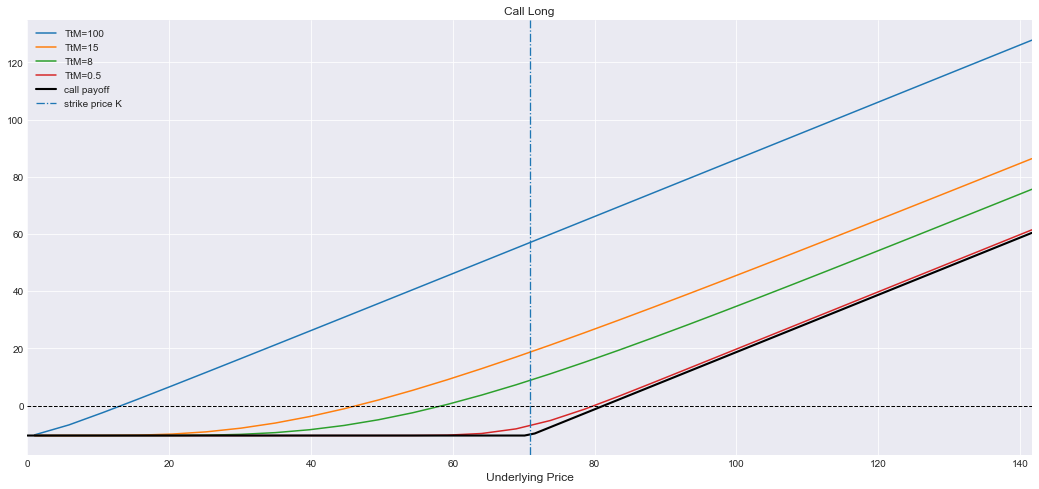

In [36]:
fig, ax = plt.subplots(1,1,figsize=(18,8))

t_100.plot(ax=ax, grid=True, label="TtM=100")
t_15.plot(ax=ax, grid=True, label="TtM=15")
t_8.plot(ax=ax, grid=True, label="TtM=8")
t_05.plot(ax=ax, grid=True, label="TtM=0.5")


call_long_at_maturity.plot(ax=ax, grid=True, linewidth=2.1, color="k", label=None)
ax.axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax.axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax.set_title("Call Long", fontsize=12)
ax.set_xlabel("Underlying Price", fontsize=12)
ax.legend()

plt.legend()
plt.show()

In [22]:
call_long_at_maturity  = option_payoff_at_maturity(K, call_premium, option="call", position="long")
call_short_at_maturity = option_payoff_at_maturity(K, call_premium, option="call", position="short")

put_long_at_maturity  = option_payoff_at_maturity(K, call_premium, option="put", position="long")
put_short_at_maturity = option_payoff_at_maturity(K, call_premium, option="put", position="short")

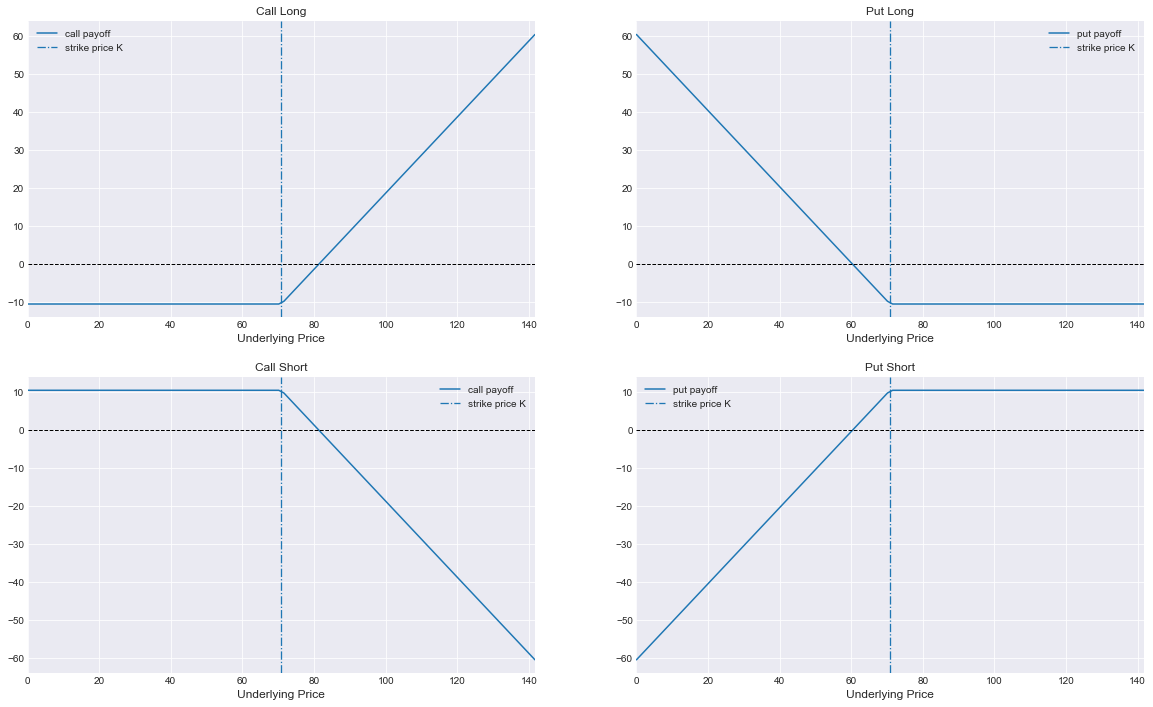

In [23]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.flatten()

# Call Long
call_long_at_maturity.plot(ax=ax[0], grid=True, label=None)
ax[0].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[0].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[0].set_title("Call Long", fontsize=12)
ax[0].set_xlabel("Underlying Price", fontsize=12)
ax[0].legend()

# Put Long
put_long_at_maturity.plot(ax=ax[1], grid=True, label=None)
ax[1].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[1].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[1].set_title("Put Long", fontsize=12)
ax[1].set_xlabel("Underlying Price", fontsize=12)
ax[1].legend()

# Call Short
call_short_at_maturity.plot(ax=ax[2], grid=True, label=None)
ax[2].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[2].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[2].set_title("Call Short", fontsize=12)
ax[2].set_xlabel("Underlying Price", fontsize=12)
ax[2].legend()

# Put Short
put_short_at_maturity.plot(ax=ax[3], grid=True, label=None)
ax[3].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[3].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[3].set_title("Put Short", fontsize=12)
ax[3].set_xlabel("Underlying Price", fontsize=12)
ax[3].legend()

plt.show()